In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
# Относительный путь к исходному файлу данных
save_dir="..\\data"
file_path = os.path.join(save_dir, "final_result_dataset.csv")
data = pd.read_csv(file_path, sep=';', encoding='utf-8')

In [ ]:
# Подсчет статистических характеристик
print(data.isnull().sum())
print(data.describe())
print(data.info())

target_body_name           0
launch_date_YYYY-MM-DD     0
arrival_date_YYYY-MM-DD    0
tof_days_d                 0
delta_v_km_s               0
orbit_altitude_km          0
semi_major_axis_km         0
eccentricity               0
arg_periapsis_deg          0
raan_deg                   0
inclination_deg            0
mean_anomaly_deg           0
r1_x_km                    0
r1_y_km                    0
r1_z_km                    0
r2_x_km                    0
r2_y_km                    0
r2_z_km                    0
r1_total_corrected_x_km    0
r1_total_corrected_y_km    0
r1_total_corrected_z_km    0
v1_transfer_x_km_s         0
v1_transfer_y_km_s         0
v1_transfer_z_km_s         0
r2_total_corrected_x_km    0
r2_total_corrected_y_km    0
r2_total_corrected_z_km    0
v2_transfer_x_km_s         0
v2_transfer_y_km_s         0
v2_transfer_z_km_s         0
dtype: int64
        tof_days_d  delta_v_km_s  ...  v2_transfer_y_km_s  v2_transfer_z_km_s
count  2830.000000   2830.000000  ...  

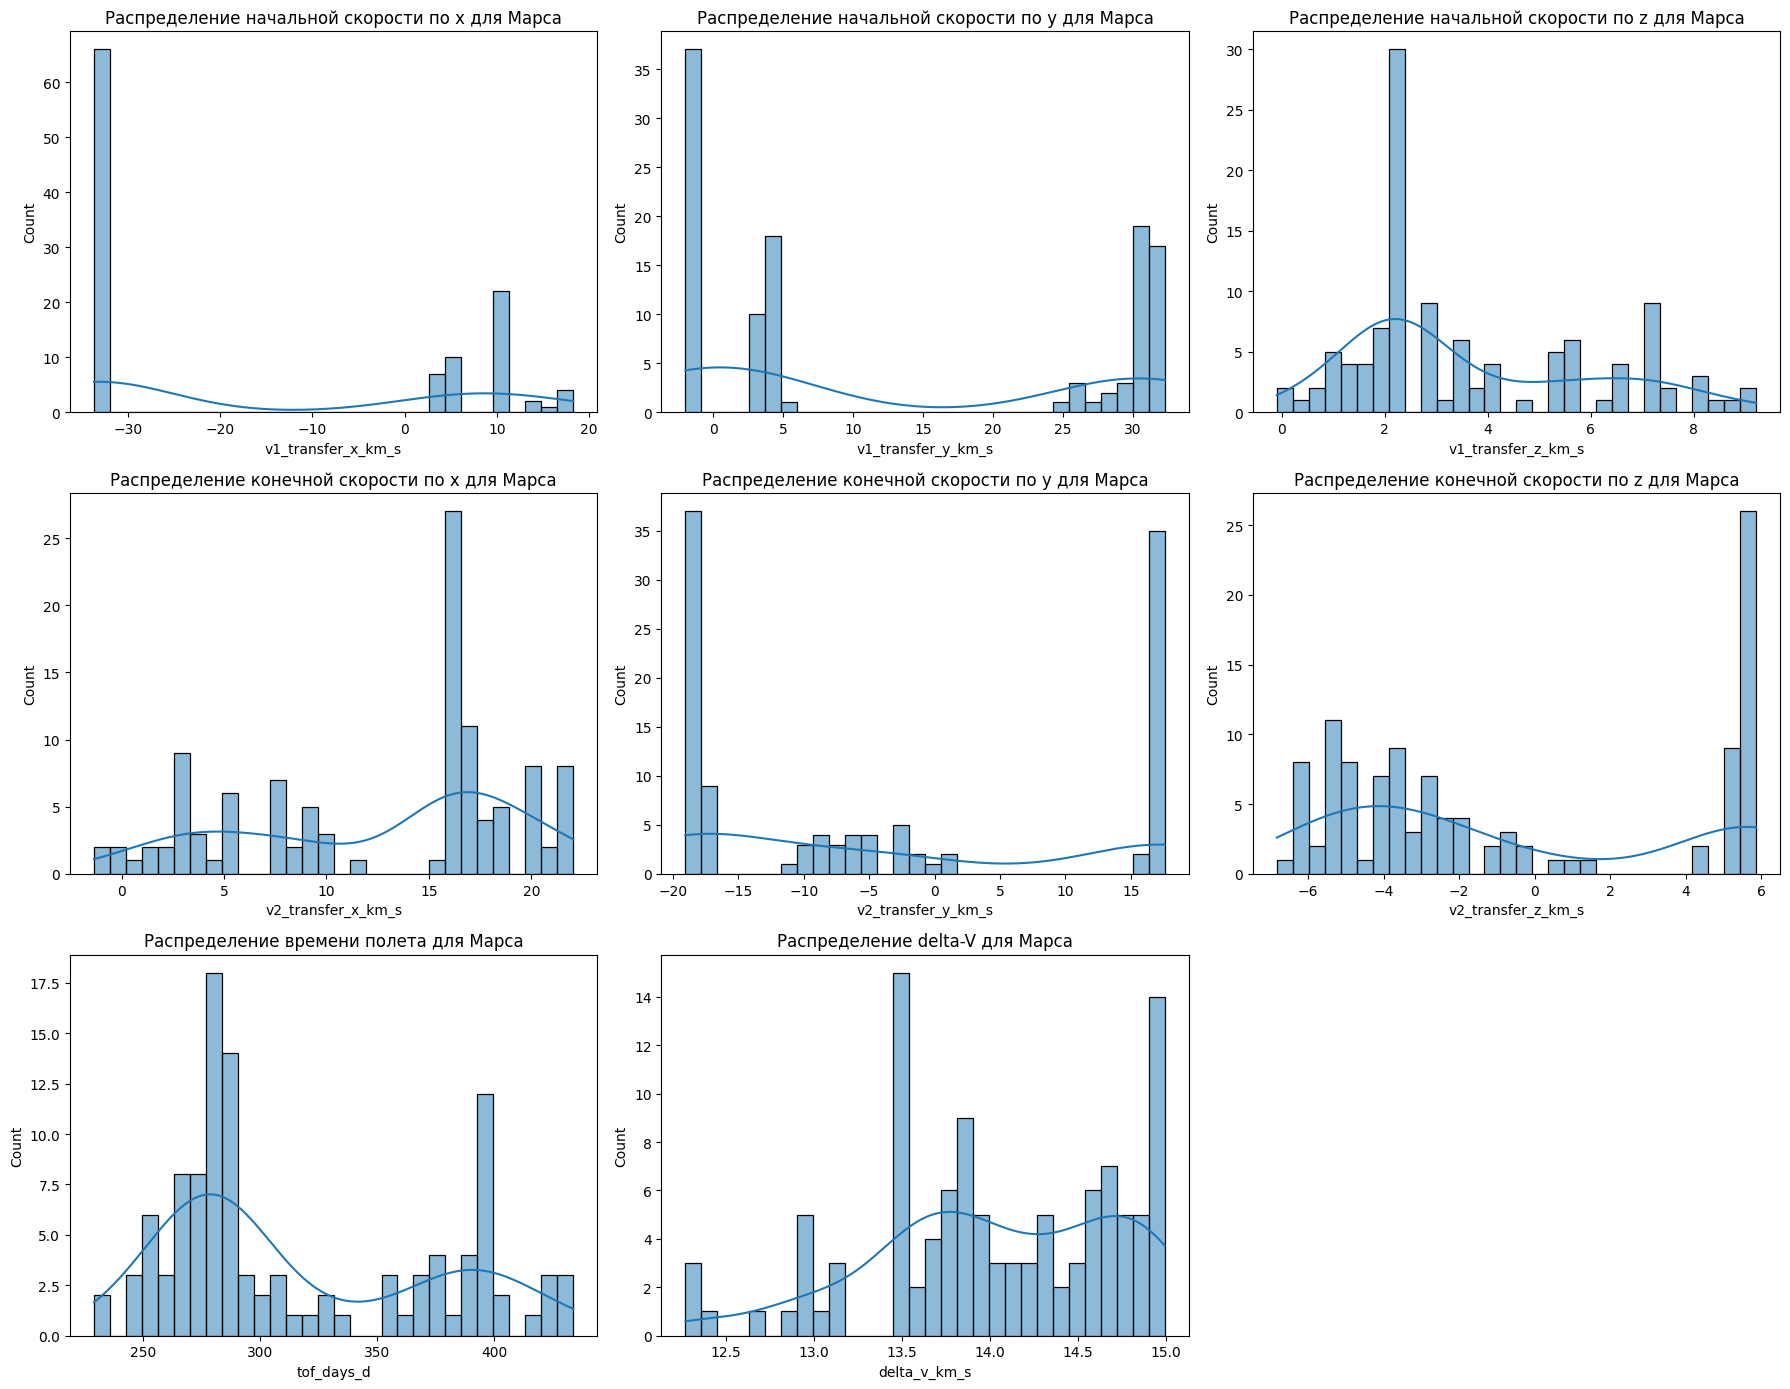

In [9]:
data_mars = data[data['target_body_name'] == "Mars"]

plt.figure(figsize=(18, 14))

# Начальная скорость по x
plt.subplot(3, 3, 1)
sns.histplot(data_mars['v1_transfer_x_km_s'], bins=30, kde=True)
plt.title("Распределение начальной скорости по x для Марса")

# Начальная скорость по y
plt.subplot(3, 3, 2)
sns.histplot(data_mars['v1_transfer_y_km_s'], bins=30, kde=True)
plt.title("Распределение начальной скорости по y для Марса")

# Начальная скорость по z
plt.subplot(3, 3, 3)
sns.histplot(data_mars['v1_transfer_z_km_s'], bins=30, kde=True)
plt.title("Распределение начальной скорости по z для Марса")

# Конечная скорость по x
plt.subplot(3, 3, 4)
sns.histplot(data_mars['v2_transfer_x_km_s'], bins=30, kde=True)
plt.title("Распределение конечной скорости по x для Марса")

# Конечная скорость по y
plt.subplot(3, 3, 5)
sns.histplot(data_mars['v2_transfer_y_km_s'], bins=30, kde=True)
plt.title("Распределение конечной скорости по y для Марса")

# Конечная скорость по z
plt.subplot(3, 3, 6)
sns.histplot(data_mars['v2_transfer_z_km_s'], bins=30, kde=True)
plt.title("Распределение конечной скорости по z для Марса")

# Время полета
plt.subplot(3, 3, 7)
sns.histplot(data_mars['tof_days_d'], bins=30, kde=True)
plt.title("Распределение времени полета для Марса")

# Delta-V
plt.subplot(3, 3, 8)
sns.histplot(data_mars['delta_v_km_s'], bins=30, kde=True)
plt.title("Распределение delta-V для Марса")

plt.tight_layout()
plt.show()

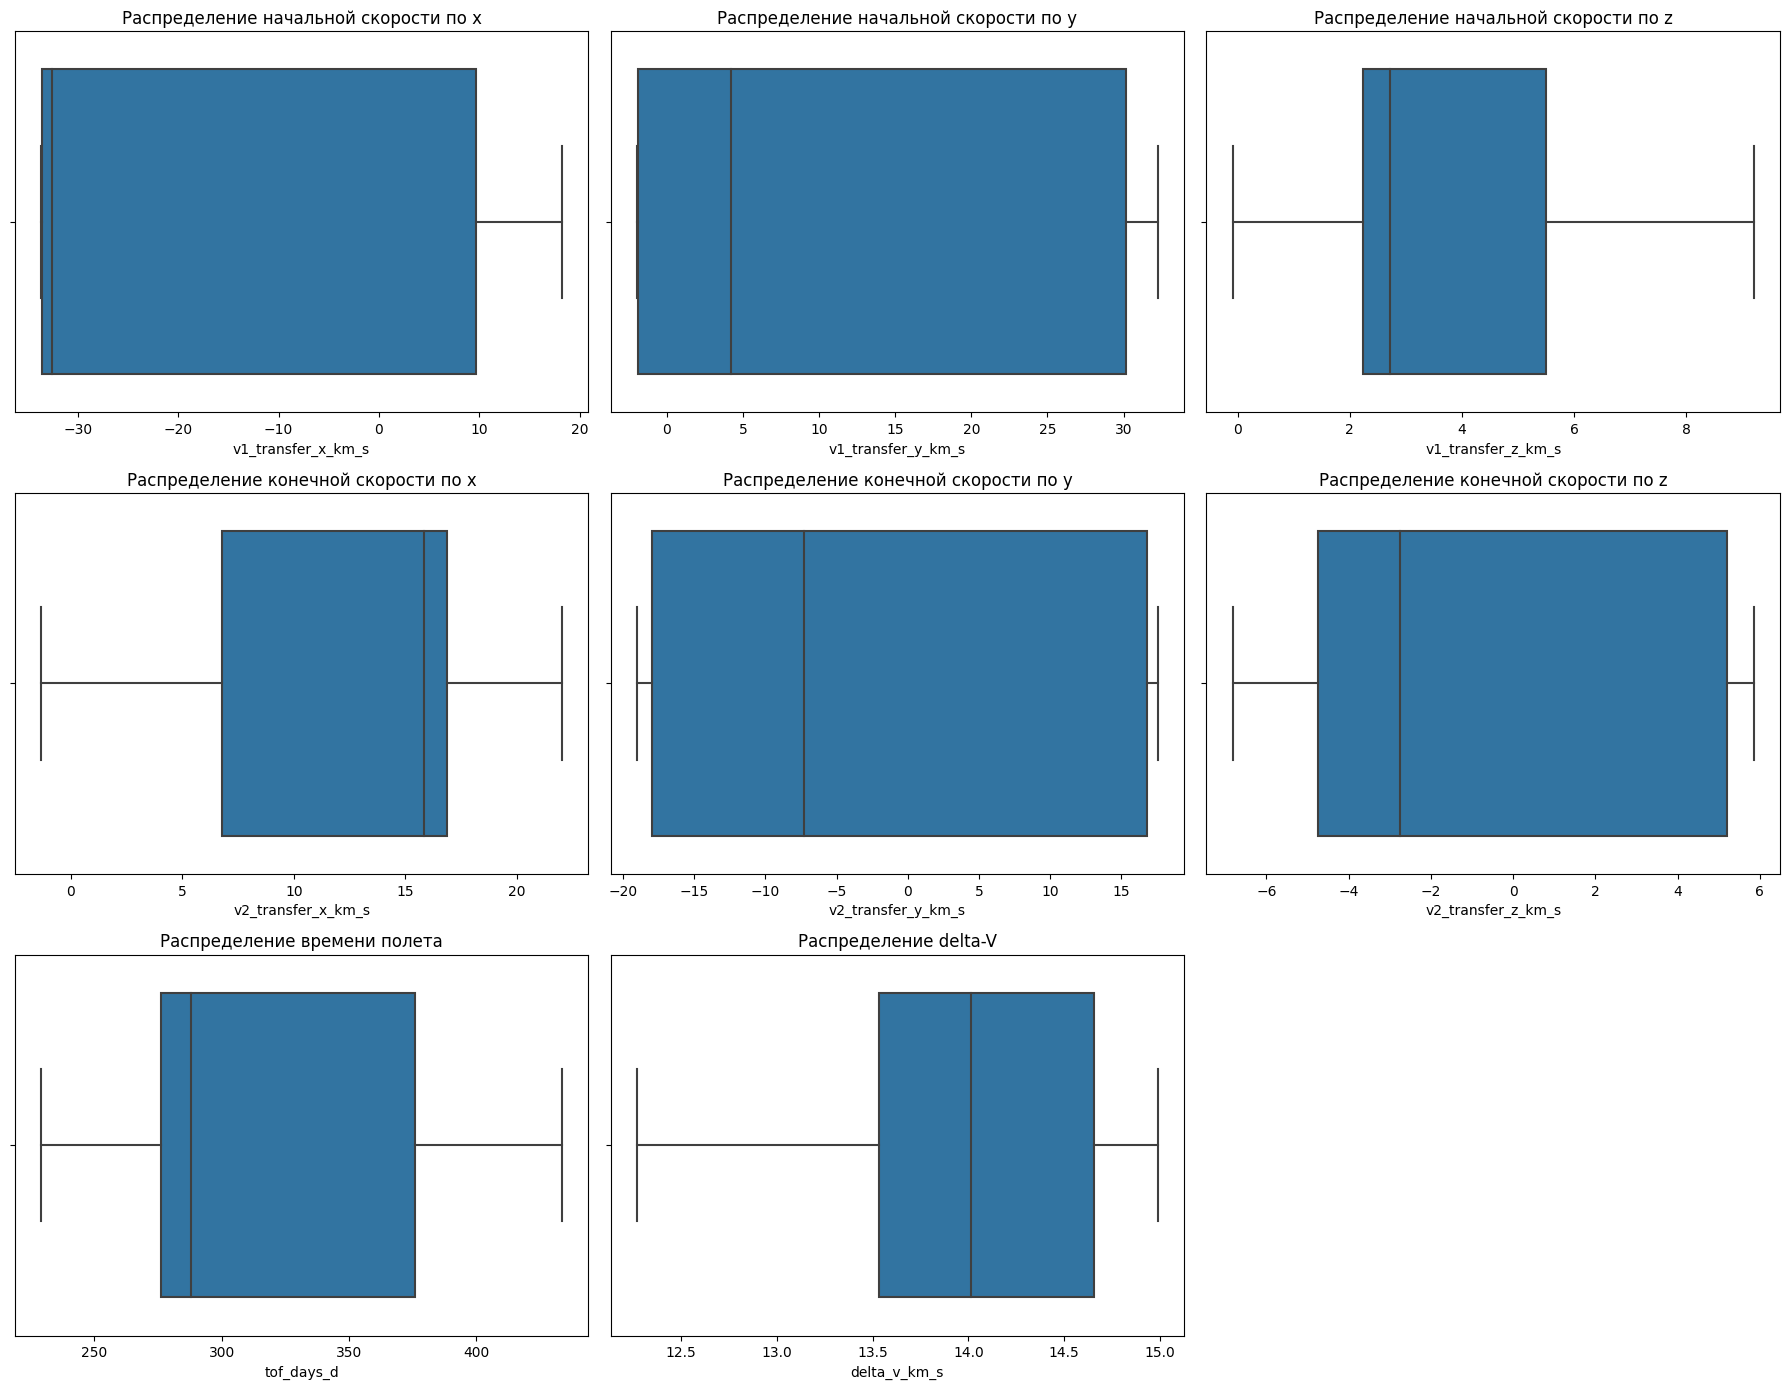

In [10]:
plt.figure(figsize=(18, 14))
data_mars = data[data['target_body_name'] == "Mars"]
# Начальная скорость по x
plt.subplot(3, 3, 1)
sns.boxplot(x=data_mars['v1_transfer_x_km_s'])
plt.title("Распределение начальной скорости по x")

# Начальная скорость по y
plt.subplot(3, 3, 2)
sns.boxplot(x=data_mars['v1_transfer_y_km_s'])
plt.title("Распределение начальной скорости по y")

# Начальная скорость по z
plt.subplot(3, 3, 3)
sns.boxplot(x=data_mars['v1_transfer_z_km_s'])
plt.title("Распределение начальной скорости по z")

# Конечная скорость по x
plt.subplot(3, 3, 4)
sns.boxplot(x=data_mars['v2_transfer_x_km_s'])
plt.title("Распределение конечной скорости по x")

# Конечная скорость по y
plt.subplot(3, 3, 5)
sns.boxplot(x=data_mars['v2_transfer_y_km_s'])
plt.title("Распределение конечной скорости по y")

# Конечная скорость по z
plt.subplot(3, 3, 6)
sns.boxplot(x=data_mars['v2_transfer_z_km_s'])
plt.title("Распределение конечной скорости по z")

# Время полета
plt.subplot(3, 3, 7)
sns.boxplot(x=data_mars['tof_days_d'])
plt.title("Распределение времени полета")

# Delta-V
plt.subplot(3, 3, 8)
sns.boxplot(x=data_mars['delta_v_km_s'])
plt.title("Распределение delta-V")

plt.tight_layout()
plt.show()

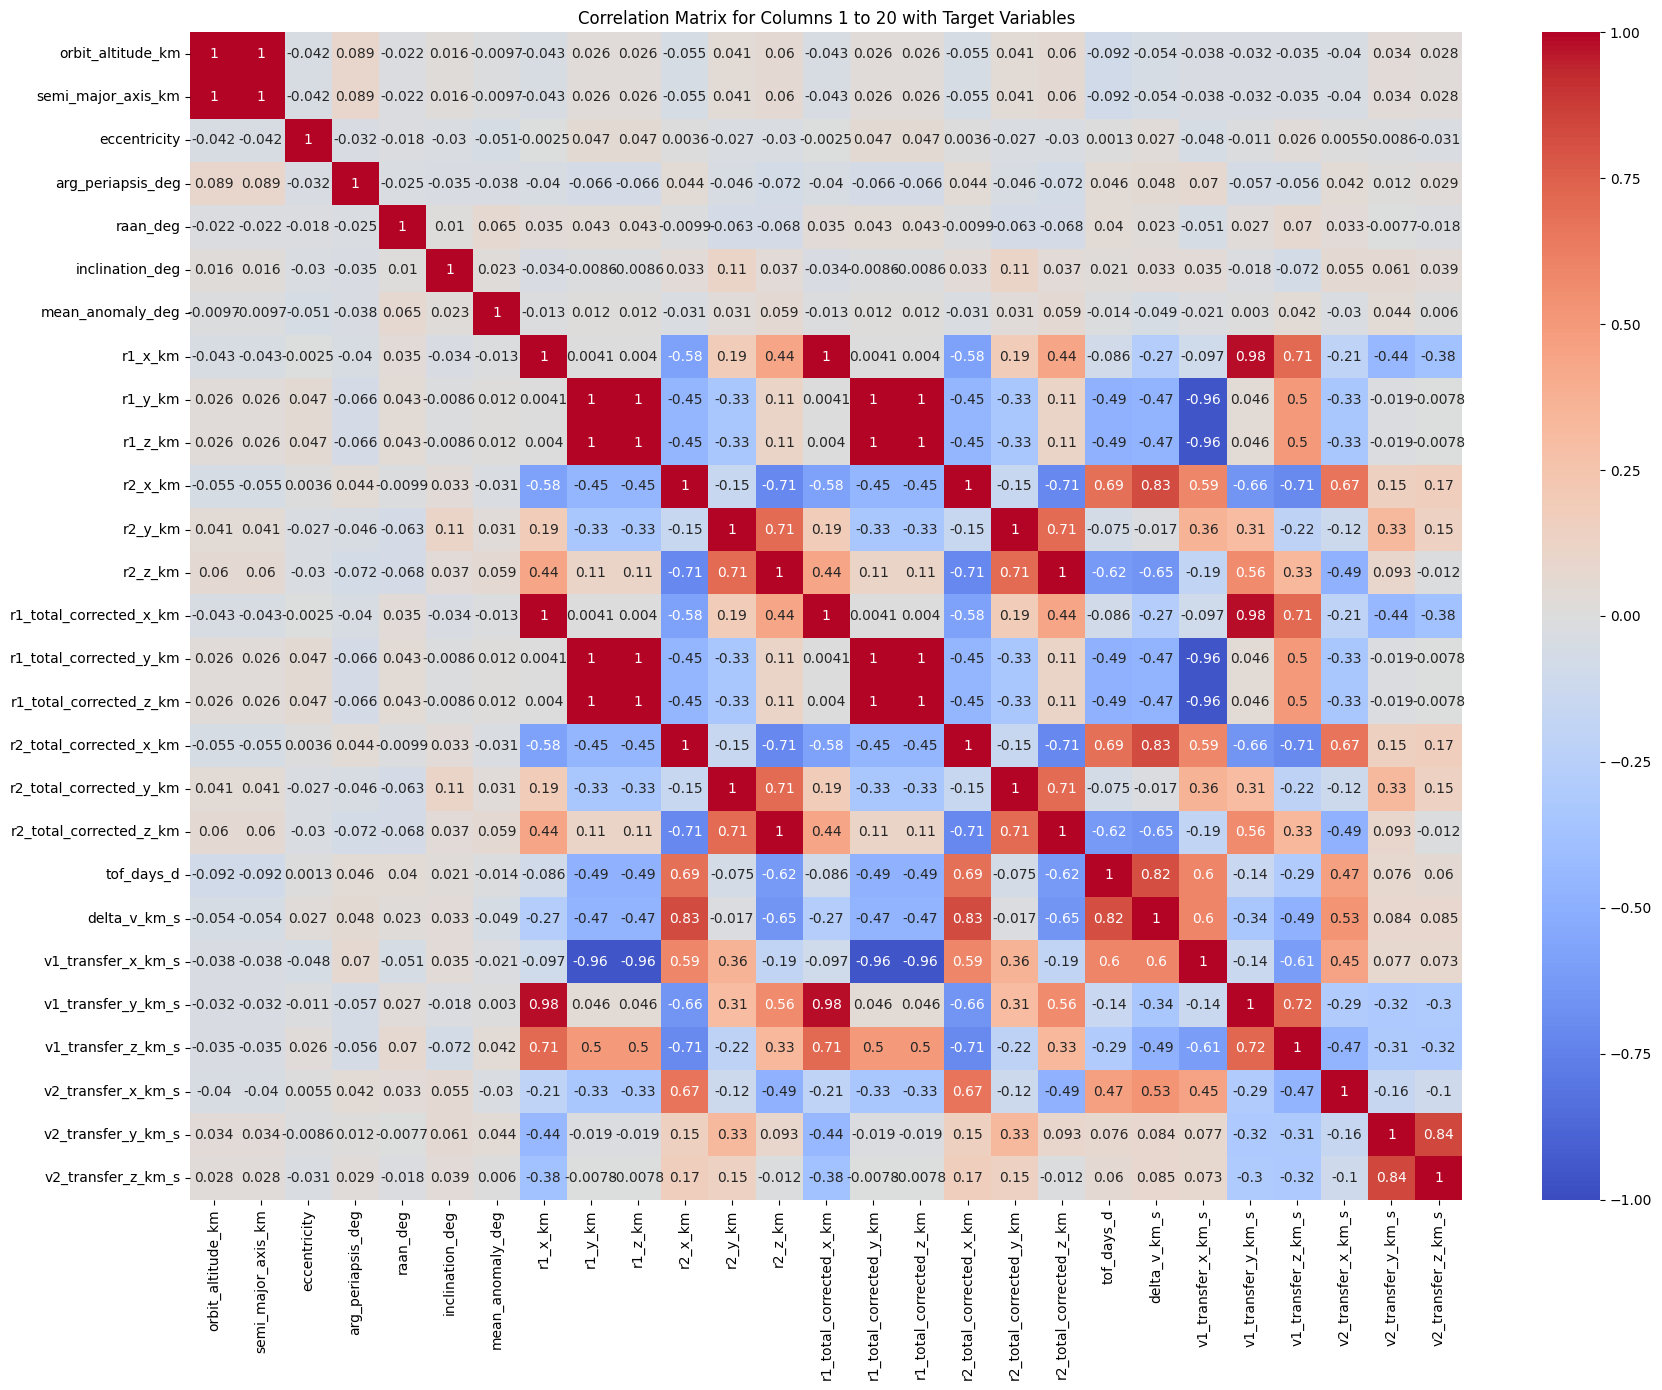

In [22]:
target_columns = ['tof_days_d', 'delta_v_km_s', 'v1_transfer_x_km_s', 'v1_transfer_y_km_s', 
                  'v1_transfer_z_km_s', 'v2_transfer_x_km_s', 'v2_transfer_y_km_s', 'v2_transfer_z_km_s']

columns = data.select_dtypes(include=[np.number]).columns

non_target_columns = [col for col in columns if col not in target_columns]

n_cols = 20  # Количество нецелевых столбцов в каждой подгруппе

n_plots = len(non_target_columns) // n_cols + int(len(non_target_columns) % n_cols > 0)

for i in range(n_plots):
    col_subset = non_target_columns[i * n_cols: (i + 1) * n_cols] + target_columns
    
    correlation_subset = data[col_subset].corr()

    plt.figure(figsize=(18, 14))
    sns.heatmap(correlation_subset, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title(f'Корреляционная матрица взаимосвязи')
    plt.tight_layout()
    plt.show()

<Figure size 1200x800 with 0 Axes>

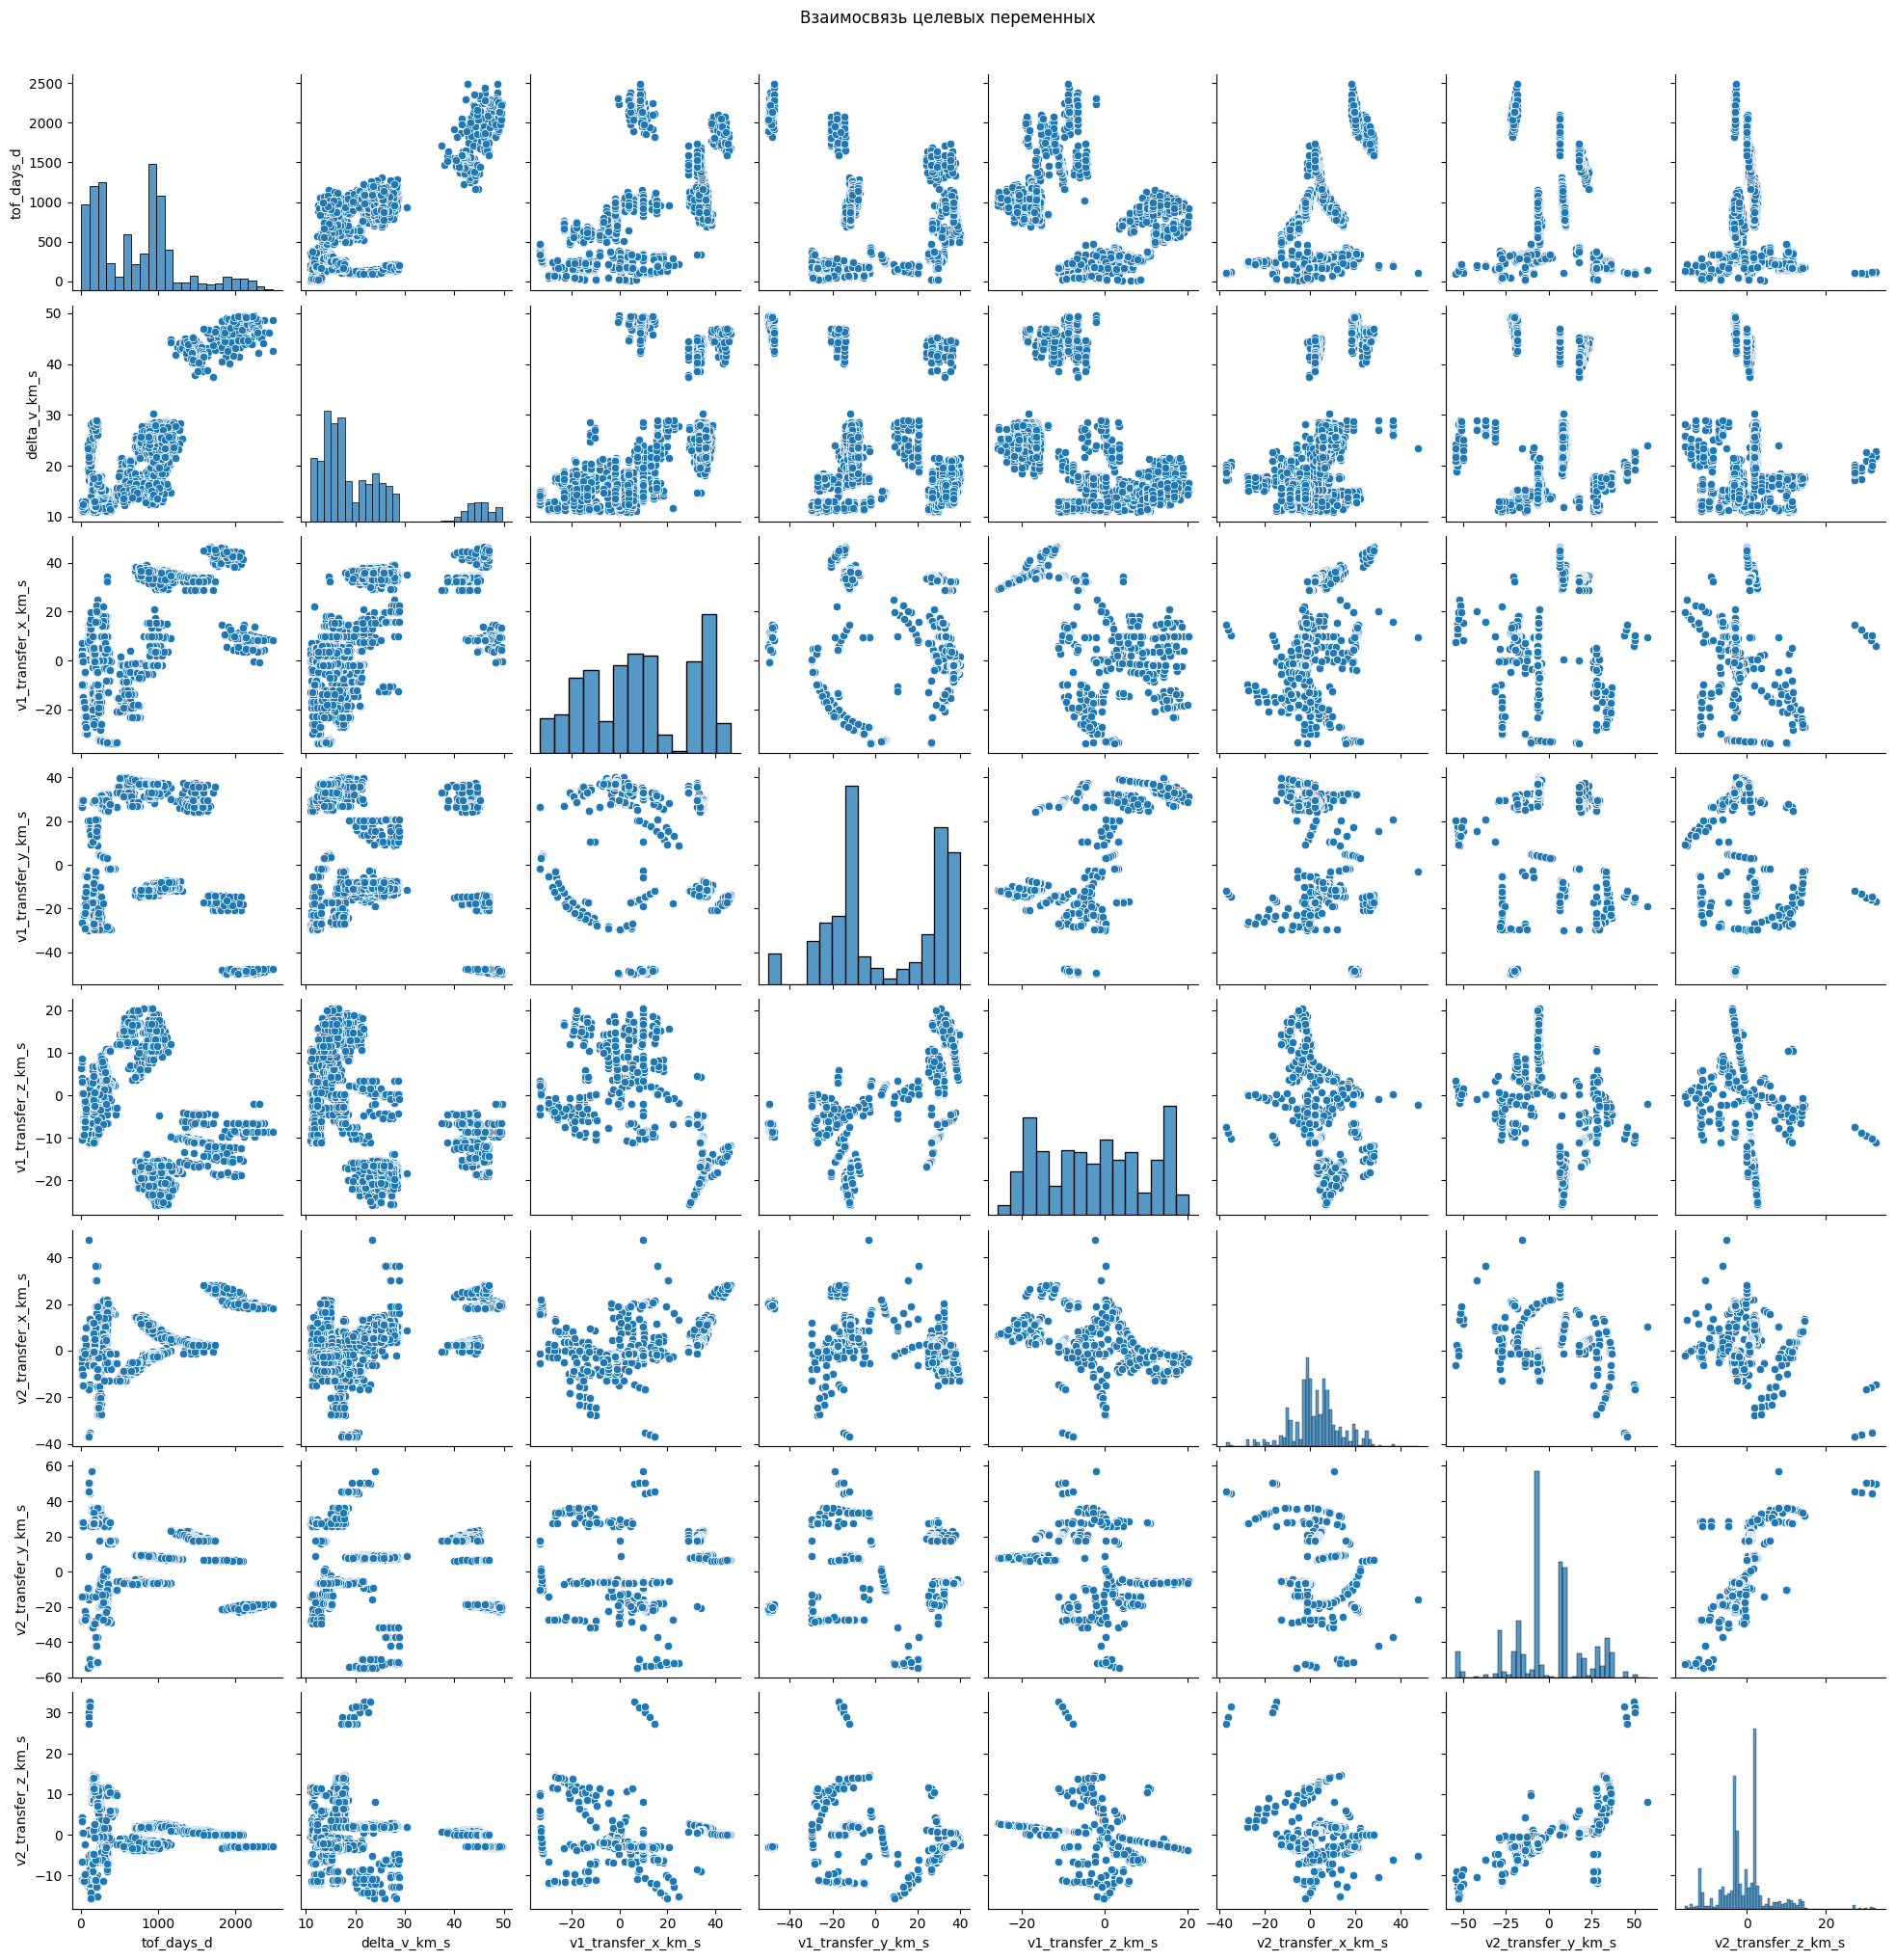

In [23]:
plt.figure(figsize=(12, 8))
sns.pairplot(data[['tof_days_d', 'delta_v_km_s', 'v1_transfer_x_km_s', 'v1_transfer_y_km_s', 
                  'v1_transfer_z_km_s', 'v2_transfer_x_km_s', 'v2_transfer_y_km_s', 'v2_transfer_z_km_s']])
plt.suptitle("Взаимосвязь целевых переменных", y=1.02)
plt.show()

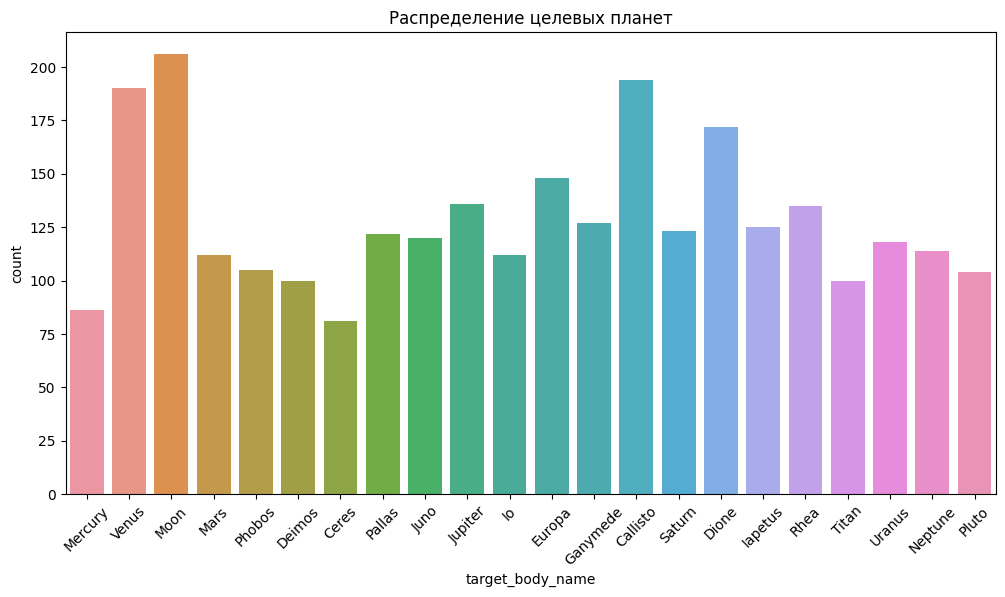

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='target_body_name')
plt.xticks(rotation=45)
plt.title("Распределение целевых планет")
plt.show()